In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

In [4]:
# Set paths
baseDir = os.path.join(os.getcwd(),'..')
codeDir = os.path.join(baseDir, 'code')
dataDir = os.path.join(baseDir, 'data')
stimDir = os.path.join(baseDir, 'BOLD5000_Stimuli_Shared')
N_TUNING_CURVES =8

In [5]:
# Read the Linguistic File
df = pd.read_csv(os.path.join(dataDir, f'lingDirectionsAverage.csv'),index_col=0)

In [6]:
#Create the Cosine Similarity for this matrix
df_new = pd.DataFrame(cosine_similarity(df),index=df.index,columns=df.index)
df_new.to_csv('Similarity_matrix_ling_direction.csv')

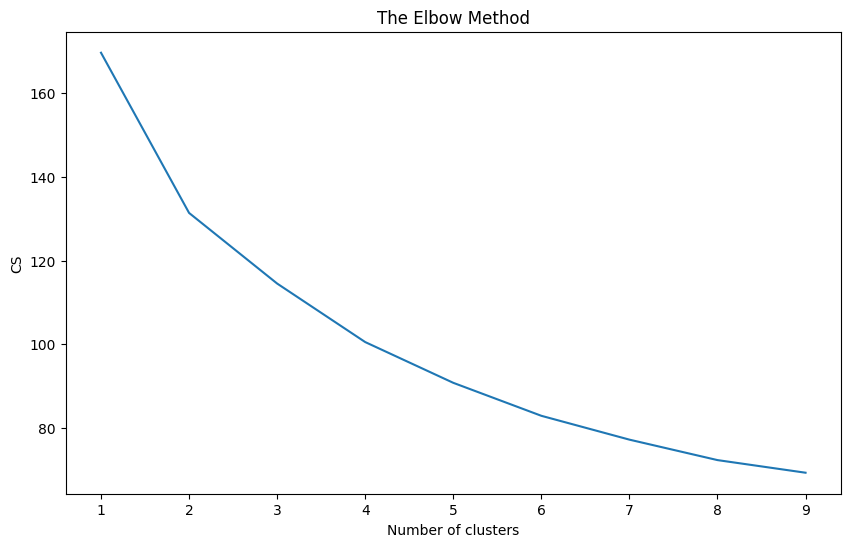

In [7]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [8]:
# Number of Optimized clusters here would be 4.
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df)

KMeans(n_clusters=3)

In [9]:
pred = kmeans.predict(df)
frame = pd.DataFrame.copy(df)
frame['cluster'] = pred
frame['cluster'].value_counts()

#Getting unique labels
label = np.unique(pred)
print(label)

[0 1 2]


In [10]:
# Including the Ahead in the the Right Side
def calculateFrame_avg():
    frame_avg= frame.copy()
    frame_avg["right_average"] = frame_avg.loc[:, ["right","sharp_right","slight_right"]].mean(axis = 1)
    frame_avg["left_average"] = frame_avg.loc[:, ["left","sharp_left","slight_left",]].mean(axis = 1)

    #Print the Clusters 
    df1 = frame_avg[frame_avg['cluster'] == 0]
    df2 = frame_avg[frame_avg['cluster'] == 1]
    df3 = frame_avg[frame_avg['cluster'] == 2]

    ax = df1.plot(x='right_average', y='left_average', kind='scatter', c='r', label='C-1')
    df2.plot(x='right_average', y='left_average', kind='scatter', ax=ax, c='g', label='C-2')
    df3.plot(x='right_average', y='left_average', kind='scatter', ax=ax, c='b', label='C-3')
    plt.show()


/opt/homebrew/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1254: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


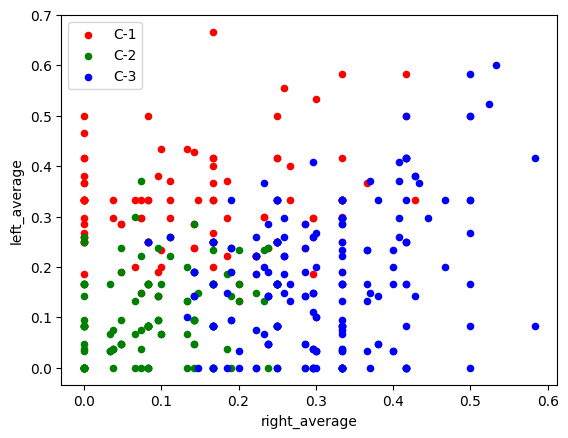

In [11]:
calculateFrame_avg()